# Redes Neuronales: Práctico 1

El sistema de dos ecuacioens diferencias ordinarias definido como

$$
\dot{C}(t) = \alpha C(t) - \beta C(t) Z(t)
$$
$$
\dot{Z}(t) = - \gamma Z(t) + \delta C(t) Z(t)
$$

es conocido como Modelo de predadores y presas de Lotka-Volterra. La función C(t) modela el número de conejos en un ecosistema dado, y Z(t) la cantidad de zorros en el mismo ecosistema.

## Ejercicio A

Construí el diagrama de flujo con las herramientas teóricas presentadas en el curso para el caso particular en que los parámetros toman los siguientes valores:

$$
\alpha = 0.1,\hspace{5pt} \beta = 0.02,\hspace{5pt} \gamma = 0.3,\hspace{5pt} \delta = 0.01
$$

In [3]:
import matplotlib.pylab as pl
import numpy as np
from scipy import integrate
%matplotlib inline

Para comenzar a construir el diagrama de flujo, debemos encontrar los puntos fijos del sistema, es decir los valores de C y Z para los cuales ambas derivadas valen 0.
Para facilitar la escritura, vamos a dejar de lado la variable del tiempo.

$$
\dot{C} = 0 \iff \alpha C - \beta C Z = C (\alpha - \beta Z) = 0 \iff C = 0 \lor Z = \beta / \alpha
$$

$$
\dot{Z} = 0 \iff -\gamma Z + \delta C Z = Z (\delta C - \gamma) = 0 \iff Z = 0 \lor C = \gamma / \delta
$$

Un punto posible es $C = Z = 0$ y el otro se da cuando $Z = \beta / \alpha$ y $C = \gamma / \delta$ al mismo tiempo (cualquier otra combinación inevitablemente hace que $\dot{C}$ o $\dot{Z}$ sean diferentes de cero.

Entonces tenemos 2 puntos fijos:
$$
(C, Z) = (0, 0) \land (C, Z) = (\beta / \alpha, \gamma / \delta)
$$

In [99]:
# Funciones para calcular gradiente y Jacobiano
class Equation:

    def __init__(self, a, b, c, d):
        self.alpha = a
        self.beta = b
        self.gamma = c
        self.delta = d
        self.zero_0 = np.array([0.0, 0.0])
        self.zero_1 = np.array([c / d, a / b])
    
    def grad(self, X, t=0):
        # X es un vector con 2 elementos 
        return np.array([
            self.alpha * X[0] - self.beta * X[0] * X[1],
            - self.gamma * X[1] + self.delta * X[0] * X[1]
        ])

    def jac(self, X, t=0):
        return np.array([
            [self.alpha - self.beta * X[1], -self.beta * X[0]],
            [self.delta * X[1], -self.gamma + self.delta * X[0]]
        ])

    def phase_plot(self):
        values  = np.linspace(0.3, 0.9, 5)
        vcolors = pl.cm.autumn_r(np.linspace(0.3, 1., len(values)))
        t = np.linspace(0, 100, 1000)

        pl.figure(figsize=(10,10))

        # trayectorias
        for v, col in zip(values, vcolors):
            X0 = v * self.zero_1
            X = integrate.odeint(self.grad, X0, t)
            pl.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]))

        #-------------------------------------------------------
        # grilla
        nb_points = 20

        xmax = ymax = max(np.abs(3 * self.gamma / self.delta), np.abs(3 * self.alpha / self.beta))
        x = np.linspace(0, xmax, nb_points)
        y = np.linspace(0, ymax, nb_points)

        X1 , Y1  = np.meshgrid(x, y)
        DX = self.grad([X1, Y1])
        M = (np.linalg.norm(DX)) 
        np.where(M==0, 1, M) 
        DX /= M

        #-------------------------------------------------------
        pl.title('Algunas trayectorias y campos vectoriales')
        Q = pl.quiver(X1, Y1, DX[0], DX[1], M, pivot='mid', cmap=pl.cm.jet)
        pl.xlabel('# Conejos (C)')
        pl.ylabel('# Zorros (Z)')
        pl.legend()
        pl.grid()
        pl.xlim(0, xmax)
        pl.ylim(0, ymax)
        pl.show()

In [100]:
eq = Equation(0.1, 0.02, 0.3, 0.01)

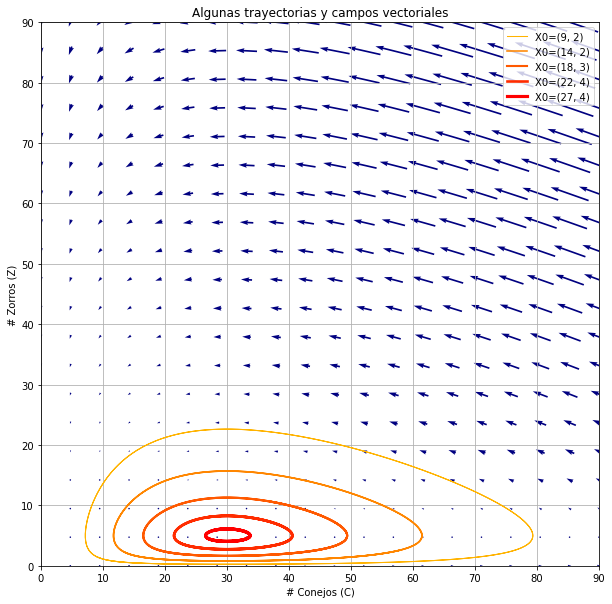

In [101]:
eq.phase_plot()